# Flight Fare Prediction

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import os
os.getcwd()

'C:\\Users\\lenovo\\Desktop\\Python Programming\\Flight-Price-Prediction-master'

In [3]:
train_data = pd.read_excel("Data_Train.xlsx")
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10683 non-null object
Date_of_Journey    10683 non-null object
Source             10683 non-null object
Destination        10683 non-null object
Route              10682 non-null object
Dep_Time           10683 non-null object
Arrival_Time       10683 non-null object
Duration           10683 non-null object
Total_Stops        10682 non-null object
Additional_Info    10683 non-null object
Price              10683 non-null int64
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
train_data['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
          ... 
19h 50m      1
3h 25m       1
29h 30m      1
36h 25m      1
29h 10m      1
Name: Duration, Length: 368, dtype: int64

In [6]:
train_data.shape  #Before

(10683, 11)

In [7]:
train_data.dropna(inplace=True)

In [8]:
train_data.shape   #After

(10682, 11)

In [9]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# EDA

In [10]:
train_data['Journey_day']=pd.to_datetime(train_data.Date_of_Journey,format="%d/%m/%Y").dt.day

In [11]:
train_data['Journey_month']=pd.to_datetime(train_data.Date_of_Journey,format="%d/%m/%Y").dt.month

In [12]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [13]:
train_data.drop('Date_of_Journey',axis='columns',inplace=True)

In [14]:
train_data['Dep_hour']=pd.to_datetime(train_data.Dep_Time).dt.hour
train_data['Dep_min']=pd.to_datetime(train_data.Dep_Time).dt.minute

In [15]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [16]:
train_data.drop('Dep_Time',axis=1,inplace=True)


In [17]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [18]:
train_data["Arr_hour"]=pd.to_datetime(train_data.Arrival_Time).dt.hour
train_data["Arr_min"]=pd.to_datetime(train_data.Arrival_Time).dt.minute
train_data.drop('Arrival_Time',axis="columns",inplace=True)


In [19]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [20]:
duration= list(train_data.Duration)
for i in range(len(duration)):
    if len(duration[i].split()) !=2:
        if "h" in duration[i]:
            duration[i]=duration[i].strip()+ " 0m"
        else:
            duration[i]="0h " + duration[i]
            
duration_hours =[]
duration_mins=[]
for i in range(len(duration)):
        duration_hours.append(int(duration[i].split(sep="h")[0]))
        duration_mins.append(int(duration[i].split(sep="m")[0].split()[-1]))

In [21]:
train_data['Duration_hours']=duration_hours
train_data['Duration_mins']=duration_mins

In [22]:
train_data.drop("Duration",axis=1,inplace=True)

In [23]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [24]:
train_data.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

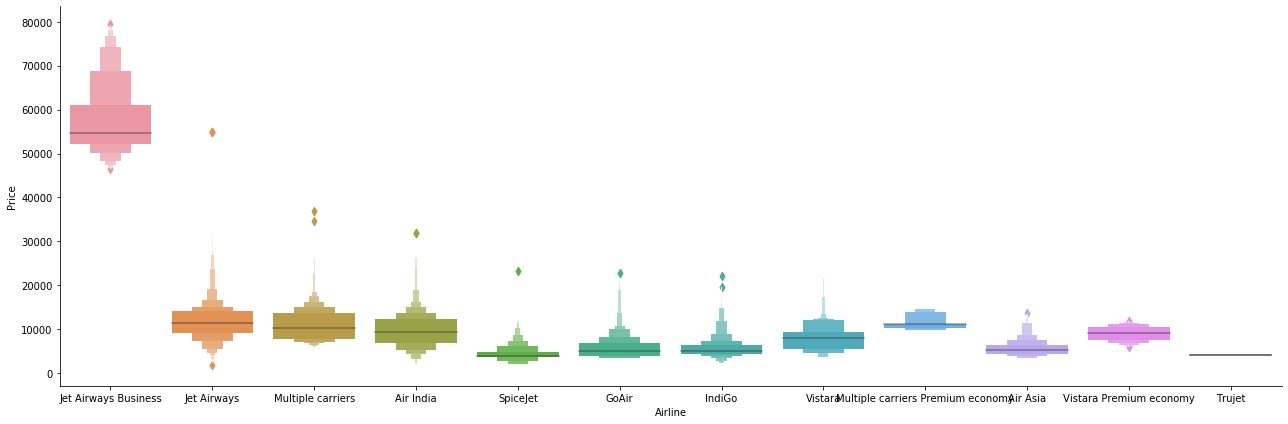

In [25]:
sns.catplot(y="Price",x="Airline",data=train_data.sort_values("Price", ascending = False),kind='boxen',height=6,aspect=3)
plt.show()

In [26]:
Airline=train_data.Airline
Airline=pd.get_dummies(Airline,drop_first=True,prefix="Airline")
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [27]:
train_data.Source.unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [28]:
train_data.Source.value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

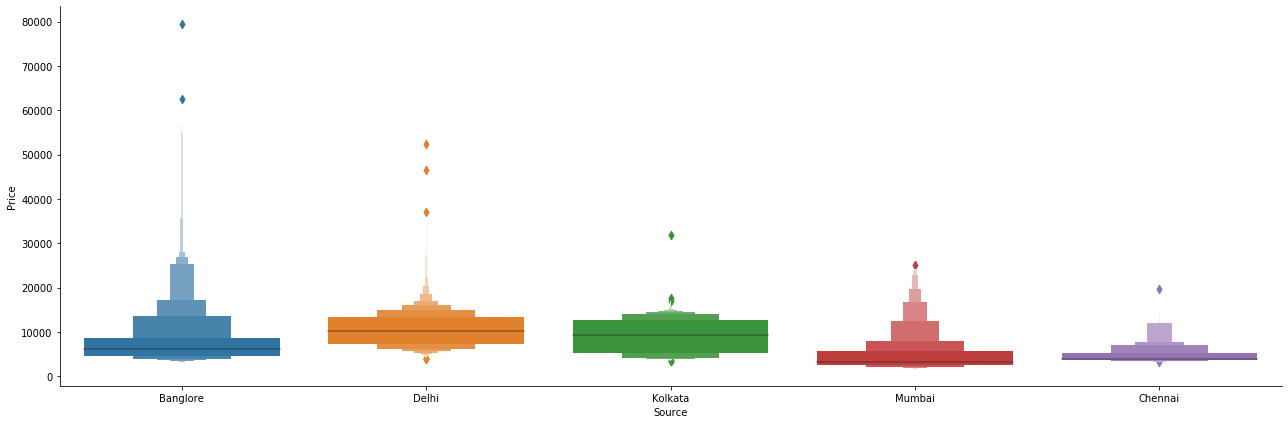

In [29]:
sns.catplot(y="Price",x="Source",data=train_data.sort_values("Price", ascending = False),kind='boxen',height=6,aspect=3)
plt.show()

In [30]:
Source=train_data.Source
Source=pd.get_dummies(Source,drop_first=True,prefix="Source")
Source.head()


,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [31]:
train_data.Destination.value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [32]:
Destination= train_data.Destination
Destination=pd.get_dummies(Destination,drop_first=True,prefix="Destination")
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [33]:
train_data.drop(['Route','Additional_Info'],axis=1,inplace=True)

In [34]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


In [35]:
train_data.Total_Stops.value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [36]:
train_data.replace({"non-stop": 0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)
train_data.head()    

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [37]:
data_train=pd.concat([train_data,Airline,Source,Destination],axis=1)

In [38]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arr_hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,...,0,0,0,0,0,0,0,0,0,1


In [39]:
data_train.drop(['Airline','Source','Destination'],axis=1,inplace=True)


In [40]:
data_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [41]:
data_train.shape

(10682, 30)

# EDA on Test Set 

In [42]:
test_data=pd.read_excel("Test_set.xlsx")


In [43]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [44]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
Airline            2671 non-null object
Date_of_Journey    2671 non-null object
Source             2671 non-null object
Destination        2671 non-null object
Route              2671 non-null object
Dep_Time           2671 non-null object
Arrival_Time       2671 non-null object
Duration           2671 non-null object
Total_Stops        2671 non-null object
Additional_Info    2671 non-null object
dtypes: object(10)
memory usage: 208.8+ KB


In [45]:
test_data['Journey_day']=pd.to_datetime(test_data.Date_of_Journey,format="%d/%m/%Y").dt.day
test_data['Journey_month']=pd.to_datetime(test_data.Date_of_Journey,format="%d/%m/%Y").dt.month


test_data['Dep_hour']=pd.to_datetime(test_data.Dep_Time).dt.hour
test_data['Dep_min']=pd.to_datetime(test_data.Dep_Time).dt.minute

test_data["Arr_hour"]=pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arr_min"]=pd.to_datetime(test_data.Arrival_Time).dt.minute


duration= list(test_data.Duration)
for i in range(len(duration)):
    if len(duration[i].split()) !=2:
        if "h" in duration[i]:
            duration[i]=duration[i].strip()+ " 0m"
        else:
            duration[i]="0h " + duration[i]
            
duration_hours =[]
duration_mins=[]
for i in range(len(duration)):
        duration_hours.append(int(duration[i].split(sep="h")[0]))
        duration_mins.append(int(duration[i].split(sep="m")[0].split()[-1]))
        
test_data['Duration_hours']=duration_hours
test_data['Duration_mins']=duration_mins

test_Airline=test_data.Airline
test_Airline=pd.get_dummies(test_Airline,drop_first=True,prefix="Airline")

test_Source=test_data.Source
test_Source=pd.get_dummies(test_Source,drop_first=True,prefix="Source")

test_Destination= test_data.Destination
test_Destination=pd.get_dummies(test_Destination,drop_first=True,prefix="Destination")

test_data.replace({"non-stop": 0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)

test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hours,Duration_mins
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1,No info,6,6,17,30,4,25,10,55
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1,No info,12,5,6,20,10,20,4,0
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1,In-flight meal not included,21,5,19,15,19,0,23,45
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1,No info,21,5,8,0,21,0,13,0
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,0,No info,24,6,23,55,2,45,2,50


In [46]:
data_test=pd.concat([test_data,test_Airline,test_Source,test_Destination],axis=1)
data_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1,No info,...,0,0,1,0,0,1,0,0,0,0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1,No info,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1,In-flight meal not included,...,0,0,1,0,0,1,0,0,0,0
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1,No info,...,0,0,1,0,0,1,0,0,0,0
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,0,No info,...,0,0,0,0,0,0,1,0,0,0


In [47]:
data_test.shape

(2671, 37)

In [48]:
data_test.drop(['Airline','Source','Destination','Date_of_Journey','Route','Additional_Info',
                'Duration','Arrival_Time','Dep_Time'],axis=1,inplace=True)

In [49]:
data_test.shape

(2671, 28)

In [50]:
data_train.shape

(10682, 30)

# Feature Selection

In [51]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arr_hour', 'Arr_min', 'Duration_hours', 'Duration_mins',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [53]:
X=data_train.loc[:,['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arr_hour', 'Arr_min', 'Duration_hours', 'Duration_mins',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,0,1


In [58]:
data_train.shape

(10682, 29)

In [75]:
y=data_train.iloc[:,1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

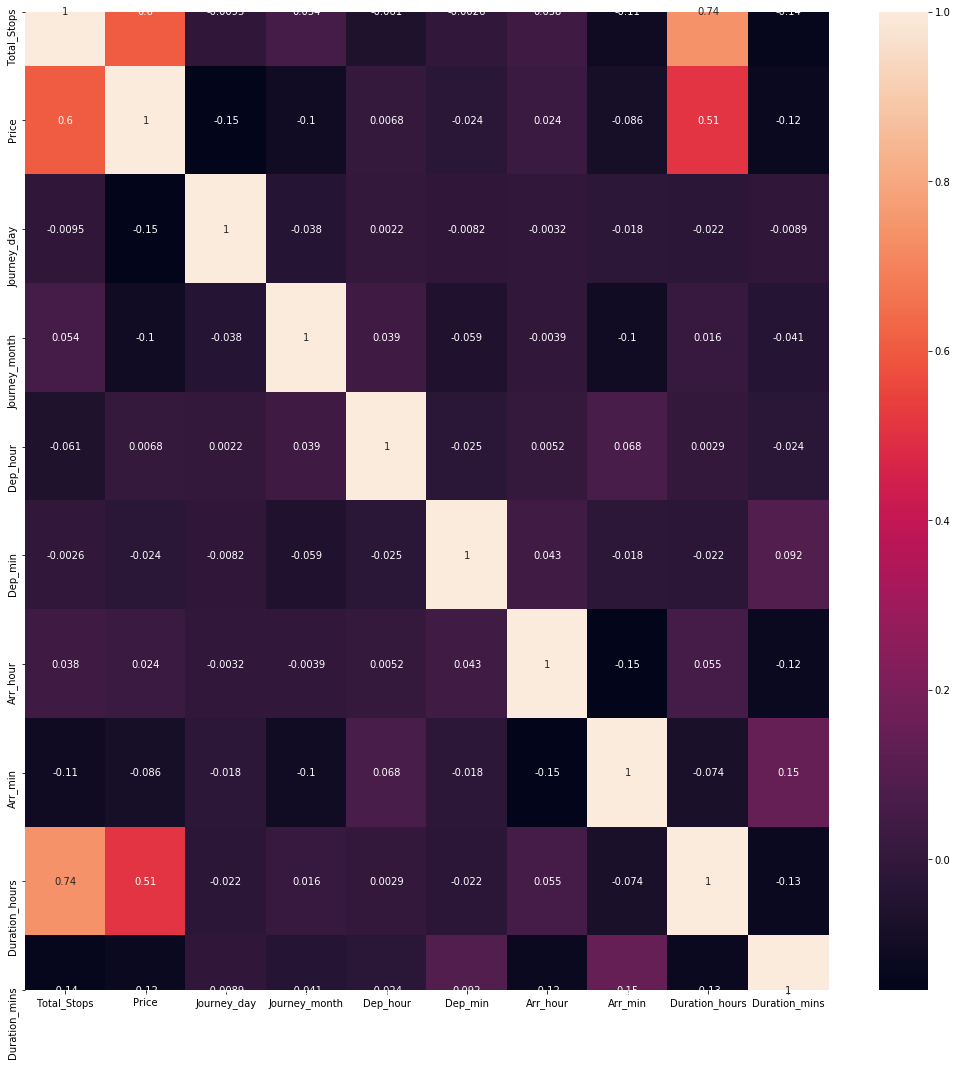

In [76]:
plt.figure(figsize=(18,18))
sns.heatmap(train_data.corr(),annot=True)
plt.show()

In [77]:
from sklearn.ensemble import ExtraTreesRegressor   #this helps to find out important features
selec=ExtraTreesRegressor(n_estimators=100)
selec.fit(X,y)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

In [78]:
print(selec.feature_importances_)

[2.13508655e-01 1.42426253e-01 5.42997347e-02 2.41818039e-02
 2.11684149e-02 2.73922912e-02 1.94724396e-02 1.33132492e-01
 1.76615582e-02 1.02264129e-02 1.75603179e-03 1.67229908e-02
 1.41436173e-01 6.74208893e-02 1.99898511e-02 8.74430912e-04
 2.95517555e-03 9.39095000e-05 5.32391090e-03 8.28537991e-05
 4.91851012e-04 1.27176984e-02 3.10200891e-03 5.52888247e-03
 1.03441510e-02 1.54458001e-02 6.65939923e-03 5.73978361e-04
 2.50099589e-02]


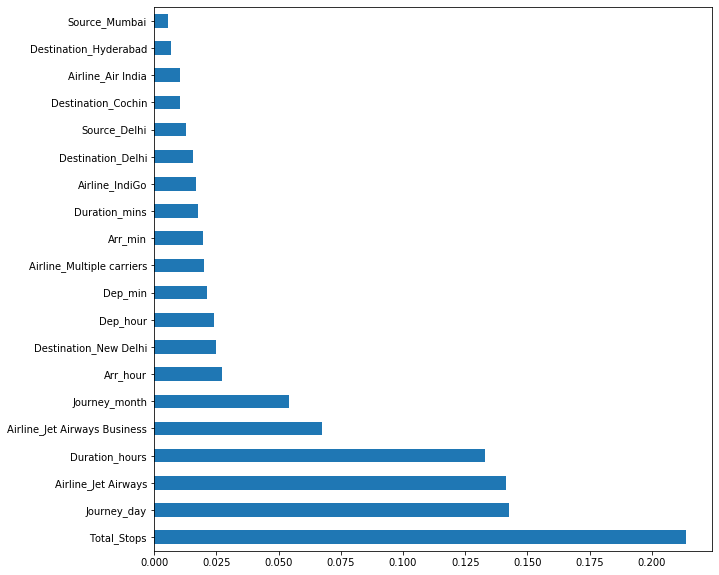

In [83]:
plt.figure(figsize=(10,10))
feature_importances=pd.Series(selec.feature_importances_,index=X.columns)
feature_importances.nlargest(20).plot(kind='barh')
plt.show()

In [84]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=2)

In [86]:
from sklearn.ensemble import RandomForestRegressor
rfReg=RandomForestRegressor(n_estimators=100)
rfReg.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [87]:
rfReg.score(X_train,y_train)

0.9545936505188254

In [89]:
rfReg.score(X_test,y_test)

0.7796255574447912

In [90]:
y_pred=rfReg.predict(X_test)

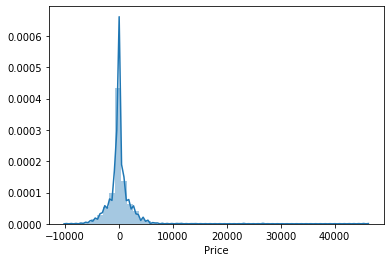

In [92]:
plt.figure(figsize=(9,9))
sns.distplot(y_test-y_pred)
plt.show()

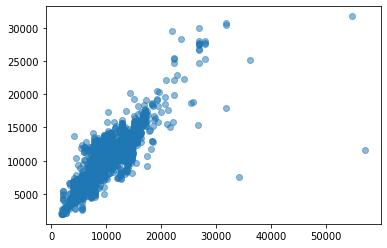

In [93]:
plt.figure(figsize=(9,9))
plt.scatter(y_test,y_pred,alpha=0.5)
plt.show()

In [106]:
from sklearn import metrics
print("Mean Absolute Error    :{:.4f}".format(metrics.mean_absolute_error(y_test,y_pred)))
print("Mean Squared Error     :{:.4f}".format(metrics.mean_squared_error(y_test,y_pred)))
print("Root Mean Squared Error:{:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test,y_pred))))

Mean Absolute Error    :1199.4436
Mean Squared Error     :4901813.8815
Root Mean Squared Error:2214.0040


In [107]:
metrics.r2_score(y_test,y_pred)

0.7796255574447912

# Hyper Parameter Tuning

In [115]:
from sklearn.model_selection import RandomizedSearchCV

In [116]:
n_estimators=[int(x) for x in np.linspace(start=1000,stop=1300,num=12)]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(5,30,num=6)]
min_samples_split=[2,5,10,15,50,100]
min_samples_leaf=[1,2,5,10]

In [117]:
random_grid={'n_estimators':n_estimators,
            'max_features':max_features,
             "max_depth":max_depth,
             "min_samples_leaf":min_samples_leaf,
             "min_samples_split":min_samples_split
            }

In [120]:
randsearch=RandomizedSearchCV(estimator=rfReg,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,
                              verbose=2,random_state=42,n_jobs=1)

In [121]:
randsearch.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1163, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=30 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1163, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=  11.8s
[CV] n_estimators=1163, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=30 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.7s remaining:    0.0s


[CV]  n_estimators=1163, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=  11.2s
[CV] n_estimators=1163, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1163, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=  11.3s
[CV] n_estimators=1163, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1163, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=  11.3s
[CV] n_estimators=1163, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1163, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=  11.5s
[CV] n_estimators=1218, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=10 
[CV]  n_estimators=1218, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=10, total=  14.0s
[CV] n_estimators=1218, min_samples_s

[CV]  n_estimators=1272, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=5, total=   3.8s
[CV] n_estimators=1272, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1272, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=5, total=   4.8s
[CV] n_estimators=1272, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1272, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=5, total=   3.8s
[CV] n_estimators=1272, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1272, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=5, total=   3.7s
[CV] n_estimators=1272, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1272, min_samples_split=10, min_samples_leaf=5, max_features=sqrt, max_depth=5, total=   3.8s
[CV] n_estimators=1054, min_samples_split=5

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  8.3min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                                                   n_jobs=None, oob_score=False,
                                                   random_state=...


In [122]:
randsearch.best_params_

{'n_estimators': 1054,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 15}

In [125]:
predicted=randsearch.predict(X_test)

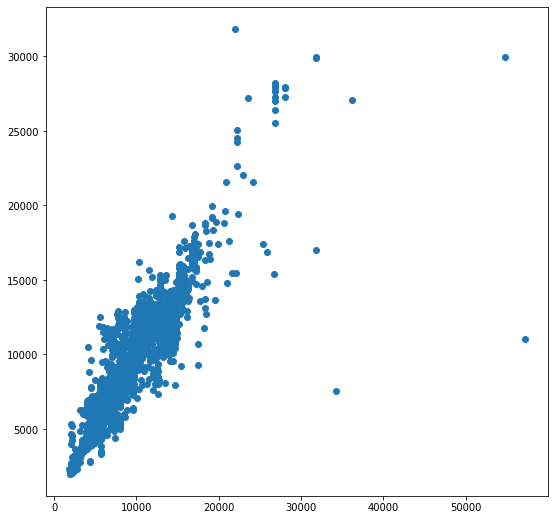

In [128]:
plt.figure(figsize=(9,9))
plt.scatter(y_test,predicted)
plt.show()

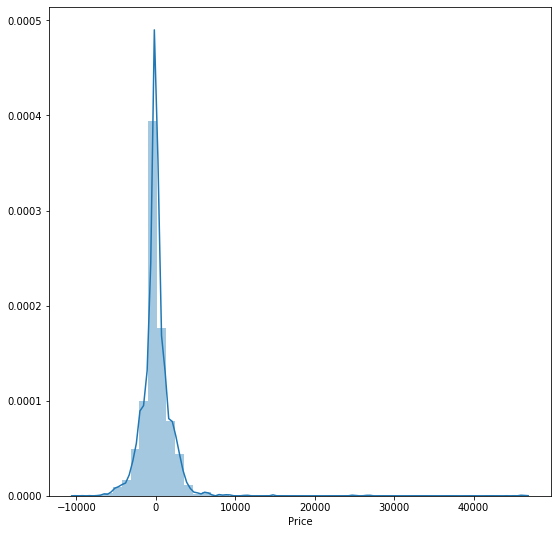

In [129]:
plt.figure(figsize=(9,9))
sns.distplot(y_test-predicted)
plt.show()

In [130]:
from sklearn import metrics
print("Mean Absolute Error    :{:.4f}".format(metrics.mean_absolute_error(y_test,predicted)))
print("Mean Squared Error     :{:.4f}".format(metrics.mean_squared_error(y_test,predicted)))
print("Root Mean Squared Error:{:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test,predicted))))

Mean Absolute Error    :1166.6628
Mean Squared Error     :4519806.8285
Root Mean Squared Error:2125.9837


In [131]:
metrics.r2_score(y_test,predicted)

0.7967997287609532

In [2]:
pip install jupyter ipython django-extensions

Note: you may need to restart the kernel to use updated packages.
